In [2]:
# 코드 3-1 IMDB 데이터셋 로드하기
from keras.datasets import imdb

In [3]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

In [4]:
# 코드 3-2 정수 시퀀스를 이진 행렬로 인코딩하기
import numpy as np

In [5]:
def vectorize_sequences(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [6]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [7]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [8]:
# 코드 3-3 모델 정의하기
from keras import models
from keras import layers

In [9]:
model = models.Sequential()
model.add(layers.Dense(16, activation = "relu", input_shape = (10000,)))
model.add(layers.Dense(16, activation = "relu"))
model.add(layers.Dense(1, activation = "sigmoid"))

In [10]:
# 코드 3-4 모델 컴파일하기
model.compile(loss = "binary_crossentropy",
             optimizer = "rmsprop",
             metrics = ["accuracy"])

In [11]:
# 코드 3-5 옵티마이저 설정하기
from keras import optimizers

model.compile(optimizer = optimizers.RMSprop(lr = 0.001),
             loss = "binary_crossentropy",
             metrics = ["accuracy"])

In [12]:
# 코드 3-6 손실과 측정을 함수 객체로 지정하기
from keras import losses
from keras import metrics

model.compile(optimizer = optimizers.RMSprop(lr = 0.001),
             loss = losses.binary_crossentropy,
             metrics = [metrics.binary_accuracy])

In [13]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [14]:
# 코드 3-8 모델 훈련하기
model.compile(loss = "binary_crossentropy",
             optimizer = "rmsprop",
             metrics = ["acc"])

In [15]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data = (x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 1s 62us/step - loss: 0.5288 - acc: 0.7685 - val_loss: 0.3991 - val_acc: 0.8434
Epoch 2/20
15000/15000 [==============================] - 1s 42us/step - loss: 0.3044 - acc: 0.8989 - val_loss: 0.3035 - val_acc: 0.8877
Epoch 3/20
15000/15000 [==============================] - 1s 42us/step - loss: 0.2205 - acc: 0.9288 - val_loss: 0.2867 - val_acc: 0.8865
Epoch 4/20
15000/15000 [==============================] - 1s 42us/step - loss: 0.1734 - acc: 0.9458 - val_loss: 0.2812 - val_acc: 0.8870
Epoch 5/20
15000/15000 [==============================] - 1s 42us/step - loss: 0.1411 - acc: 0.9562 - val_loss: 0.3515 - val_acc: 0.8641
Epoch 6/20
15000/15000 [==============================] - 1s 42us/step - loss: 0.1183 - acc: 0.9628 - val_loss: 0.2925 - val_acc: 0.8875
Epoch 7/20
15000/15000 [==============================] - 1s 42us/step - loss: 0.0964 - acc: 0.9718 - val_loss: 0.3169 - val_acc

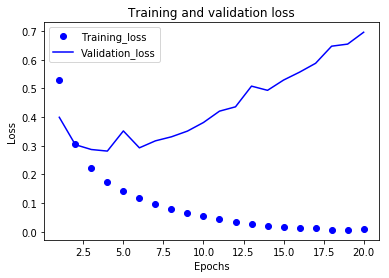

In [20]:
# 코드 3-9 훈련과 검증 손실 그리기
import matplotlib.pyplot as plt

loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, "bo", label = "Training_loss")
plt.plot(epochs, val_loss, "b", label = "Validation_loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

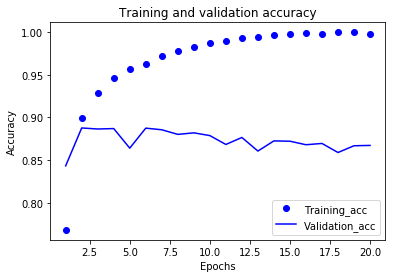

In [22]:
# 코드 3-10 훈련과 검증 정확도 그리기
plt.clf() # 그래프 초기화
acc = history.history["acc"]
val_acc = history.history["val_acc"]

plt.plot(epochs, acc, "bo", label = "Training_acc")
plt.plot(epochs, val_acc, "b", label = "Validation_acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.show()

In [23]:
# 코드 3-11 모델을 처음부터 다시 훈련하기
model = models.Sequential()
model.add(layers.Dense(16, activation = "relu", input_shape = (10000,)))
model.add(layers.Dense(16, activation = "relu"))
model.add(layers.Dense(1, activation = "sigmoid"))

model.compile(loss = "binary_crossentropy",
             optimizer = "rmsprop",
             metrics = ["accuracy"])

model.fit(x_train, y_train, epochs = 4, batch_size = 512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 1s 35us/step - loss: 0.4423 - accuracy: 0.8234
Epoch 2/4
25000/25000 [==============================] - 1s 32us/step - loss: 0.2576 - accuracy: 0.9116
Epoch 3/4
25000/25000 [==============================] - 1s 32us/step - loss: 0.1981 - accuracy: 0.9302
Epoch 4/4
25000/25000 [==============================] - 2s 84us/step


In [24]:
results

[0.29515314868927, 0.8835999965667725]